In [0]:
# Imports
            
import pandas as pd
import numpy as np
import nltk
import re
import sklearn
import warnings
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download("stopwords")
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from tensorflow import keras  



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# Data Collection

df = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

# Take relevant data from DataFrame and put it in Numpy Array

# tweets = df['text'].as_matrix()
tweets = df['text'].tolist()
labels = df['class_label'].to_numpy()
testTweets = df2['text'].tolist()
testLabels = df2['class_label'].to_numpy()

# labels = df['class_label'].as_matrix()


In [0]:
# Preprocess Strings

# Remove extra whitespace
# i=0
# for tweet in tweets:
#   tweets[i] = tweet.strip()
#   i+=1

# # Lowercase tweets
# i=0
# for tweet in tweets:
#   tweets[i] = tweet.lower()
#   i+=1
# # Stopwords part

# def not_stopword(s):
#   s = s.strip()
#   v = stopwords.words('english')
#   result = ""
#   words = nltk.word_tokenize(s)
#   for word in words:
#     if word not in v:
#       result += word + " "
#   return result.strip()

# i=0
# for tweet in tweets:
#   tweets[i] = not_stopword(tweet)
#   ' '.join(tweet.split())
#   i+=1
  
# Remove extra whitespace
i=0
for tweet in testTweets:
  testTweets[i] = tweet.strip()
  i+=1

# Lowercase tweets
i=0
for tweet in testTweets:
  testTweets[i] = tweet.lower()
  i+=1
  
# Stopwords part

def not_stopword(s):
  s = s.strip()
  v = stopwords.words('english')
  result = ""
  words = nltk.word_tokenize(s)
  for word in words:
    if word not in v:
      result += word + " "
  return result.strip()

i=0
for tweet in testTweets:
  testTweets[i] = not_stopword(tweet)
  ' '.join(tweet.split())
  i+=1

print(testTweets)


['u pacific command see ! gave peace unity festival disappears freedom violent storm hit sea', "suicide bomber 'hits saudi mosque '", 'isis claims responsibility saudi suicide bombing', 'twia board approves 5 percent rate hike texas windstorm insurance association ( twia ) board directors v', 'wild fires west crazy', 'rt 40hourfamine bangladesh government declared floods emergency worldvision continue _', 'gold coast tram evacuated due broken powerlines local newsbrokenemergency servicesgold coastpowerlinetramtr', 'stuart broad takes eight joe root runs riot aussies', 'ah mazing story power animal rescuers ! starving homeless dog future rescued person', "opening regular master packs ? rt _ sunk _1 mil credits light side _ n't pull _one _you sure odds ?", 'regress slip fall cliff', "wen finally get girl want 'm flooding yall wit pics us rs tho", "country latin america 's next 'argentina ' one week ago reported economic devastation", 'dnb newrelease edge jimmy summer rainstorm ( lapaka s

In [0]:
# Extract Features

from sklearn.feature_extraction.text import TfidfVectorizer 
 
# Original TFID Vectorizer
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer()
 
data = tfidf_vectorizer.fit_transform(tweets).toarray()
testData = tfidf_vectorizer.transform(testTweets).toarray()
#print(type(data), data)

In [0]:
#X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.3, random_state=10)
X_train = data
Y_train = labels
X_test = testData
Y_test = testLabels

print(X_test)
print(Y_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 ... 0 0 0]


In [0]:
# Setup Neural Network 

Dense = keras.layers.Dense
Sequential = keras.Sequential
  
warnings.filterwarnings('ignore')

model = Sequential()

model.add(Dense(1, activation='sigmoid'))

W0801 16:38:21.360582 140286262925184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Compile and Train Model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, 
                    validation_split = 0.2, 
                    epochs = 20, 
                    batch_size = 25)

# Evaluate the model's performance

train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

#print(recall_score(Y_test, predictions, average='macro'))
#print(precision_score(Y_test, predictions, average='macro'))

from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred_bool))

W0801 16:38:28.452062 140286262925184 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5932 samples, validate on 1484 samples
Epoch 1/20
5932/5932 [==============================] - 1s 250us/sample - loss: 0.6779 - acc: 0.5897 - val_loss: 0.6658 - val_acc: 0.5883
Epoch 2/20
5932/5932 [==============================] - 1s 188us/sample - loss: 0.6478 - acc: 0.6160 - val_loss: 0.6463 - val_acc: 0.6146
Epoch 3/20
5932/5932 [==============================] - 1s 160us/sample - loss: 0.6233 - acc: 0.6640 - val_loss: 0.6300 - val_acc: 0.6624
Epoch 4/20
5932/5932 [==============================] - 1s 155us/sample - loss: 0.6015 - acc: 0.7048 - val_loss: 0.6154 - val_acc: 0.7028
Epoch 5/20
5932/5932 [==============================] - 1s 156us/sample - loss: 0.5817 - acc: 0.7483 - val_loss: 0.6023 - val_acc: 0.7251
Epoch 6/20
5932/5932 [==============================] - 1s 162us/sample - loss: 0.5632 - acc: 0.7775 - val_loss: 0.5902 - val_acc: 0.7399
Epoch 7/20
5932/5932 [==============================] - 1s 158us/sample - loss: 0.5461 - acc: 0.7970 - val_loss: 0.5792 - va

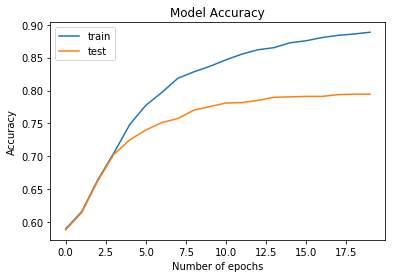

In [0]:
# Graph Model Accuracy

# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

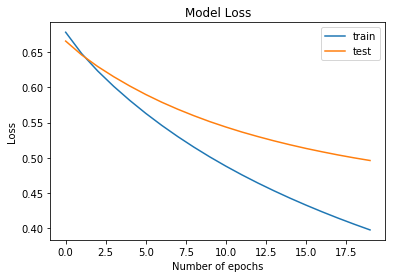

In [0]:
# Graph Model Loss
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()